# Projektarbeit 2: Describtive Statistics
## Name: Dominique Peytrignet, peytd1
### The dataset for this project ist taken from Kaggle: https://www.kaggle.com/aungpyaeap/supermarket-sales 
### It consists data from a supermarket in Myanmar in three branches. I will answer questions about the dataset and support the statements with visualisations.



 #### First I import the most importants libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### Then I read the dataset and save the dataframe as "sales"

In [2]:
sales = pd.read_csv("supermarket_sales.csv")

In [3]:
sales.head(10)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,13:27,Credit card,164.52,4.761905,8.2260,5.9


#### for more efficient coding I replace " "  with "_" in the column-names

In [4]:
sales.columns = ["invoice_id", "branch", "city", "customer_type", "gender", "product_line", "unit_price", "quantity", "tax_5", "total", "date", "time", "payment","cost_of_goods_sold", "gross_margin_percentage", "gross_income", "rating"]


#### to check from what timeframe the data is collected I sort the values by date

In [5]:
sales.sort_values(by=["date"])

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5,total,date,time,payment,cost_of_goods_sold,gross_margin_percentage,gross_income,rating
496,556-97-7101,C,Naypyitaw,Normal,Female,Electronic accessories,63.22,2,6.3220,132.7620,1/1/2019,15:51,Cash,126.44,4.761905,6.3220,8.5
484,493-65-6248,C,Naypyitaw,Member,Female,Sports and travel,36.98,10,18.4900,388.2900,1/1/2019,19:48,Credit card,369.80,4.761905,18.4900,7.0
567,651-88-7328,A,Yangon,Normal,Female,Fashion accessories,65.74,9,29.5830,621.2430,1/1/2019,13:55,Cash,591.66,4.761905,29.5830,7.7
523,133-14-7229,C,Naypyitaw,Normal,Male,Health and beauty,62.87,2,6.2870,132.0270,1/1/2019,11:43,Cash,125.74,4.761905,6.2870,5.0
970,746-04-1077,B,Mandalay,Member,Female,Food and beverages,84.63,10,42.3150,888.6150,1/1/2019,11:36,Credit card,846.30,4.761905,42.3150,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,308-47-4913,A,Yangon,Member,Female,Sports and travel,52.26,10,26.1300,548.7300,3/9/2019,12:45,Credit card,522.60,4.761905,26.1300,6.2
73,841-35-6630,C,Naypyitaw,Normal,Female,Electronic accessories,75.91,6,22.7730,478.2330,3/9/2019,18:21,Cash,455.46,4.761905,22.7730,8.7
433,616-87-0016,B,Mandalay,Normal,Male,Fashion accessories,95.54,7,33.4390,702.2190,3/9/2019,14:36,Credit card,668.78,4.761905,33.4390,9.6
585,127-47-6963,A,Yangon,Normal,Male,Health and beauty,51.71,4,10.3420,217.1820,3/9/2019,13:53,Credit card,206.84,4.761905,10.3420,9.8


#### The dataset contains data from January 1st until March 9th.

#### To check if the dataset fulfills the requirements for the project I print the datatype of all the specific columns. There must be at least three different datatypes:

In [6]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   invoice_id               1000 non-null   object 
 1   branch                   1000 non-null   object 
 2   city                     1000 non-null   object 
 3   customer_type            1000 non-null   object 
 4   gender                   1000 non-null   object 
 5   product_line             1000 non-null   object 
 6   unit_price               1000 non-null   float64
 7   quantity                 1000 non-null   int64  
 8   tax_5                    1000 non-null   float64
 9   total                    1000 non-null   float64
 10  date                     1000 non-null   object 
 11  time                     1000 non-null   object 
 12  payment                  1000 non-null   object 
 13  cost_of_goods_sold       1000 non-null   float64
 14  gross_margin_percentage  

#### The dataset fulfills this requierment

#### Whit the code on top I already checked that every column has a value in it. 
#### The same goal can also be achieved with this line of code:

In [7]:
sales.isnull().values.any()

False

#### Another requirement is that the dataset consists of atleast 3 columns and 100 lines. To check if that is the case I print the shape of the dataset

In [8]:
sales.shape

(1000, 17)

#### The dataset consists of 1000 lines and 17 columns and thus meets the requirements for the project


In [9]:
sales

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5,total,date,time,payment,cost_of_goods_sold,gross_margin_percentage,gross_income,rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


## Question #1: Which branche has the best ratings?
### Are there any differences from Male and Female by the way they rate their shoping experience?

(0.0, 11.0)

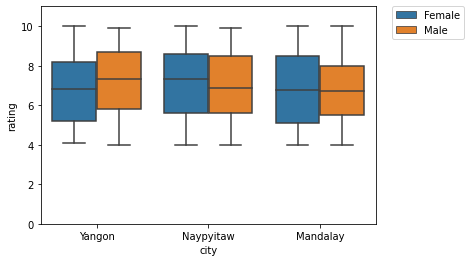

In [10]:
sns.boxplot(data=sales, x="city", y="rating", hue = "gender", )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim(0, 11)

### Every branche has nearly the same rating around the median at 7.  In Yangon, male customers tend to rate their shoping experience a bit better than females. In Naypyitaw it is the opposite and in Mandalay female and male have the same median, though female have a larger interquartile range (IQR) which means their ratings is wider distributed.

## Question #2: How many men and women have visited the supermarkets in the different cities?

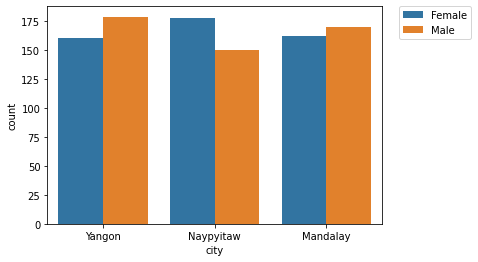

In [11]:
sns.countplot(x="city", data=sales, hue = "gender")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


### In Yangon more male customers visited the supermarket, where in Naypytaw more women went shopping. In Mandalay nearly the same amount of both genders visited the supermarket, slighlty more male though.

## Question #3: How does the rating of the different product lines corrolate with the price ?


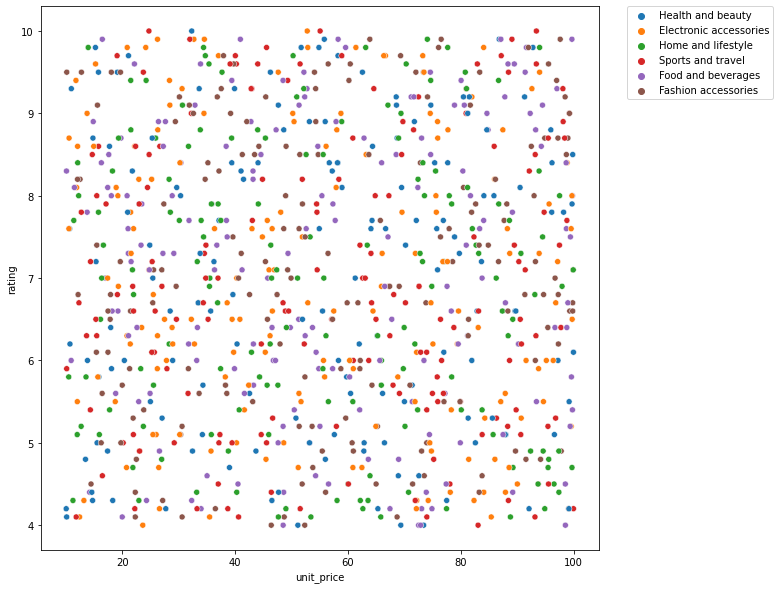

In [10]:
# Scatterplot
fig, ax = plt.subplots(figsize = (10,10))
g = sns.scatterplot(ax=ax, x="unit_price", y="rating", hue= "product_line",data=sales)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
None



### Every productline has good and bad ratings independetly of the unit price

## Question #4: Do male and female rate their shopping experience in all three branches differentely depending on the unit-price? Is there a difference of the two customertypes?

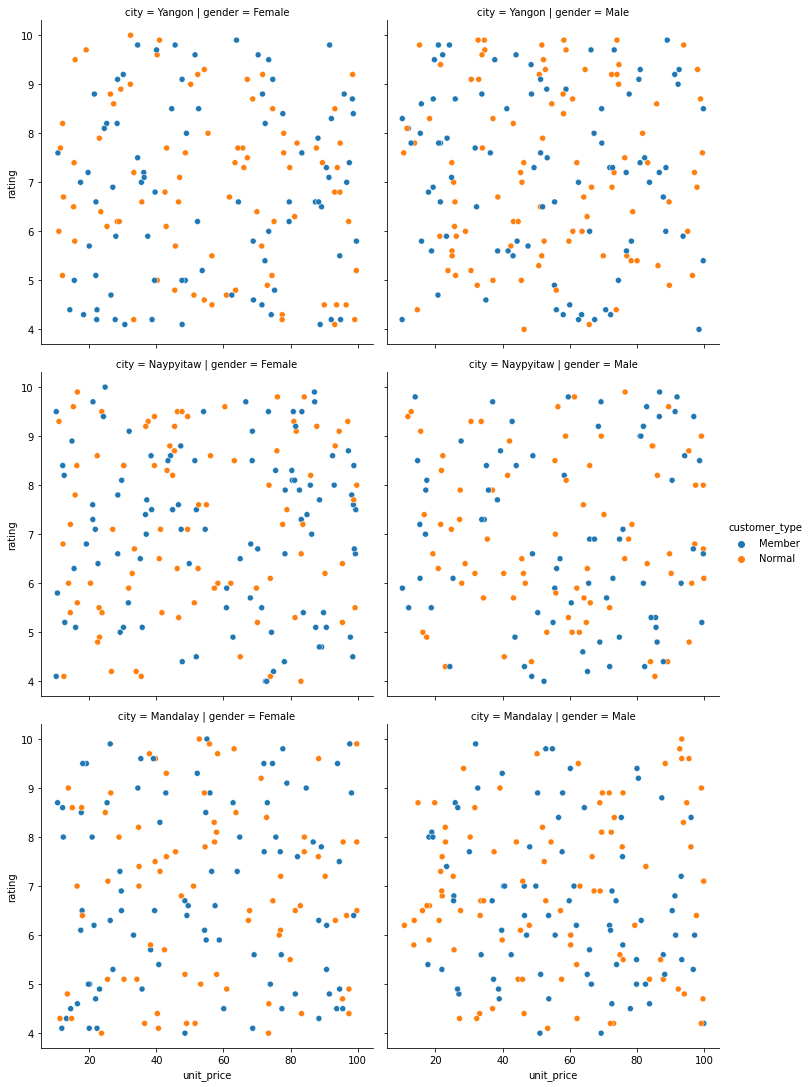

In [17]:
sns.relplot(x="unit_price", y="rating",col ="gender", row = "city", hue = "customer_type",data=sales)

### Expencive and cheap products are rated equaly by both gender in all the three branches. There is no difference by the two customer types. Only in Nypyitaw we can see that male tend to rate their experience a bit lower when the unit-price is higher, but not very significantly.


## Question #5: What is the favourite payment method in the cities?

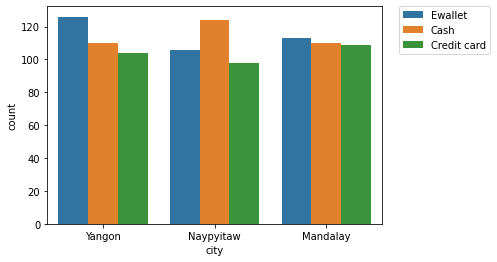

In [19]:
sns.countplot( x="city", hue= "payment",data=sales)
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
None

### Credict cards are the least favourite payment  method in all the cities. The Ewallet ist mostly used in all of the cities, besides of Naypytaw where Cash is prefered as payment method.

## Question #6: What is the most profitable timeframe for the different Supermarkets?

#### First I want to check what the opening hours are for the supermarkets

In [44]:
sales.sort_values(by=["time"])


,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5,total,date,time,payment,cost_of_goods_sold,gross_margin_percentage,gross_income,rating
913,522-57-8364,A,Yangon,Member,Male,Fashion accessories,51.34,8,20.5360,431.2560,1/31/2019,10:00,Ewallet,410.72,4.761905,20.5360,7.6
180,130-98-8941,C,Naypyitaw,Normal,Male,Fashion accessories,64.26,7,22.4910,472.3110,2/9/2019,10:00,Cash,449.82,4.761905,22.4910,5.7
293,316-68-6352,A,Yangon,Member,Female,Food and beverages,36.36,2,3.6360,76.3560,1/21/2019,10:00,Cash,72.72,4.761905,3.6360,7.1
200,606-80-4905,C,Naypyitaw,Member,Female,Sports and travel,19.15,6,5.7450,120.6450,1/29/2019,10:01,Credit card,114.90,4.761905,5.7450,6.8
669,679-22-6530,B,Mandalay,Normal,Female,Sports and travel,40.62,2,4.0620,85.3020,1/17/2019,10:01,Credit card,81.24,4.761905,4.0620,4.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,628-34-3388,C,Naypyitaw,Normal,Male,Fashion accessories,27.38,6,8.2140,172.4940,1/5/2019,20:54,Credit card,164.28,4.761905,8.2140,7.9
267,571-94-0759,B,Mandalay,Member,Female,Food and beverages,74.60,10,37.3000,783.3000,1/8/2019,20:55,Cash,746.00,4.761905,37.3000,9.5
893,715-20-1673,B,Mandalay,Normal,Male,Electronic accessories,28.38,5,7.0950,148.9950,3/6/2019,20:57,Cash,141.90,4.761905,7.0950,9.4
136,700-81-1757,A,Yangon,Normal,Female,Electronic accessories,26.31,5,6.5775,138.1275,1/18/2019,20:59,Credit card,131.55,4.761905,6.5775,8.8


#### Looking at the dataframe I can assume that the supermarkets are open from 10am to 9pm

#### To find out what timeframe ist the most profitable, I want to categorize the times in morning(10am,11am,12am), noon(1pm,2pm,3pm), afternoon(4pm,5pm,6,pm) and evening(7pm,8pm,9pm).

In [45]:
# append new column with name time_name with only the day hours 
sales["timeframe"]= sales["time"].str.split(" ", n = 2, expand = True)
sales["timeframe"]= sales["time"].str.split(":", n = 2, expand = True) 
sales



,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5,total,date,time,payment,cost_of_goods_sold,gross_margin_percentage,gross_income,rating,timeframe
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2,13
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4,17
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7,13
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1,15


In [46]:
# change the specific values to morning, noon, afternoon and evening.
for time in range(10,13):
    sales.loc[(sales.timeframe == str(time)),'timeframe']="morning"   
for time in range(13,16):
    sales.loc[(sales.timeframe == str(time)),'timeframe']="noon"   
for time in range(16,19):
    sales.loc[(sales.timeframe == str(time)),'timeframe']="afternoon"    
for time in range(19,21):
    sales.loc[(sales.timeframe == str(time)),'timeframe']="evening"
      
sales

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5,total,date,time,payment,cost_of_goods_sold,gross_margin_percentage,gross_income,rating,timeframe
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,noon
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,morning
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,noon
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,evening
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2,noon
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4,afternoon
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7,noon
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1,noon


In [48]:
sales_time=sales.groupby("timeframe").agg({
    "cost_of_goods_sold": "sum"
})
# This dataframe is sorted alphabetical but I want it to be ["morning", "noon", "afternoon", "evening"]
sales_time = sales_time.reindex(["morning", 'noon', 'afternoon', 'evening'])

<AxesSubplot:xlabel='timeframe'>

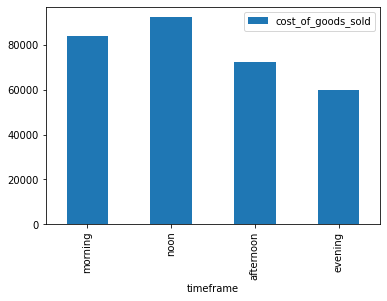

In [49]:

sales_time.plot(kind="bar")

## The time from 13:00 to 15:00 (noon) was the most profitable time for the supermarket since the beginning of the year.

## Question #7: Which month was the most profitable?

### Because March only includes about 9 days, I will exclude those and only compare January and February

In [50]:
# extract the month number in the date and create a new column. For january it will be 1
sales["month"]= sales["date"].str.split(" ", n = 2, expand = True)
sales["month"]= sales["date"].str.split("/", n = 2, expand = True) 
# the month numbers are created as objects which is wrong, they should be integers
month_numeric = pd.to_numeric(sales["month"])
# replace with new column
sales = sales.assign(month=month_numeric)
sales


,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5,total,date,time,payment,cost_of_goods_sold,gross_margin_percentage,gross_income,rating,timeframe,month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,noon,1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,morning,3
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,noon,3
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,evening,1
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,morning,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2,noon,1
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4,afternoon,3
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7,noon,2
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1,noon,2


In [51]:
# changing the numbers with the month names
sales.loc[(sales.month == 1,'month')]="January"
sales.loc[(sales.month == 2,'month')]="February"
sales.loc[(sales.month == 3,'month')]="March"
# dorp the rows from march
sales_without_march = sales.drop(sales[sales["month"] == "March"].index)
sales_without_march


,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5,total,date,time,payment,cost_of_goods_sold,gross_margin_percentage,gross_income,rating,timeframe,month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,noon,January
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,evening,January
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,morning,February
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8,noon,February
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0,morning,February
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,652-49-6720,C,Naypyitaw,Member,Female,Electronic accessories,60.95,1,3.0475,63.9975,2/18/2019,11:40,Ewallet,60.95,4.761905,3.0475,5.9,morning,February
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2,noon,January
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7,noon,February
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1,noon,February


In [52]:
pd.unique(sales_without_march["month"])

array(['January', 'February'], dtype=object)

<AxesSubplot:xlabel='month'>

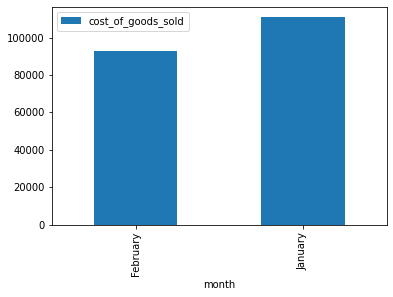

In [53]:
sales_without_march=sales_without_march.groupby("month").agg({
    "cost_of_goods_sold": "sum"})
sales_without_march.plot(kind="bar")

### The month of January was more profitable than February

 ## Question #8: What is the rating distribution of the ratings?

<AxesSubplot:xlabel='rating', ylabel='Count'>

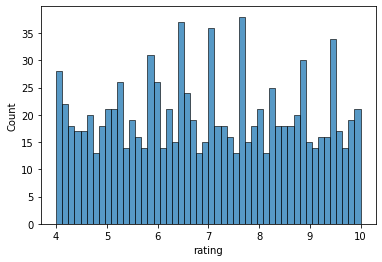

In [16]:
sns.histplot(data = sales, x = "rating", bins = 50)

### The rating range from 4 to 10. They are all even distributed with some spikes around 7.